Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

- Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner. It works by training models sequentially, where each new model focuses on correcting the mistakes of the previous ones.

- How does it improve weak learners--

1] Weighted Training: Misclassified samples are given higher weights so the next learner focuses more on them.

2] Sequential Learning: Each weak learner improves upon the errors of the previous learners.

3] Error Reduction: By combining many weak learners, overall bias and error decrease, resulting in a strong predictive model.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

- 1. Training Approach:

AdaBoost: Adjusts weights of misclassified samples after each iteration. Next learner focuses more on difficult samples.

Gradient Boosting: Uses gradient descent on a loss function to minimize errors. Each new learner fits the residual errors of the previous model.

- 2. Error Handling:

AdaBoost: Reweights samples based on classification correctness.

Gradient Boosting: Fits the negative gradient of the loss function to reduce residual error.

- 3. Loss Function:

AdaBoost: Uses exponential loss by default.

Gradient Boosting: Flexible; supports custom differentiable loss functions.

- 4. Model Dependency:

AdaBoost: More sensitive to outliers because it gives very high weight to hard samples.

Gradient Boosting: Handles outliers better by optimizing gradients gradually.

Question 3: How does regularization help in XGBoost?


- 1. Controls Overfitting:
Regularization adds a penalty term to the objective function for complex models, preventing overfitting by discouraging very deep or large trees.

- 2. L1 and L2 Regularization:

  L1 (Lasso): Makes some feature weights zero, performing feature selection.

 L2 (Ridge): Reduces the magnitude of weights, improving generalization.

- 3. Smoother Model:
By penalizing complexity, XGBoost builds simpler and more stable trees, improving prediction consistency.

- 4. Objective Function Integration:
Regularization is included directly in the loss function, balancing model fit and complexity during training.

Question 4: Why is CatBoost considered efficient for handling categorical data?

- 1. Native Categorical Feature Support:
CatBoost handles categorical variables without one-hot encoding, saving memory and computation.

- 2. Target-Based Encoding with Permutations:
It uses ordered target statistics (based on permutations) to convert categories into numeric values without causing target leakage.

- 3. Reduces Overfitting:
The permutation-driven encoding technique prevents overfitting by ensuring the model does not see the target value of the current row during transformation.

- 4. Efficient with Large Datasets:
CatBoost uses optimized algorithms for encoding and gradient boosting, making it fast even with many categorical features.

In [1]:
# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict and Accuracy
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9649122807017544


In [2]:
# Question 7: Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R-squared score:", r2_score(y_test, y_pred))


R-squared score: 0.7756446042829697


In [5]:
# Question 8: Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model (warning-free)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Grid search for learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and accuracy
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Model Accuracy:", accuracy_score(y_test, y_pred))




Best Parameters: {'learning_rate': 0.2}
Model Accuracy: 0.956140350877193


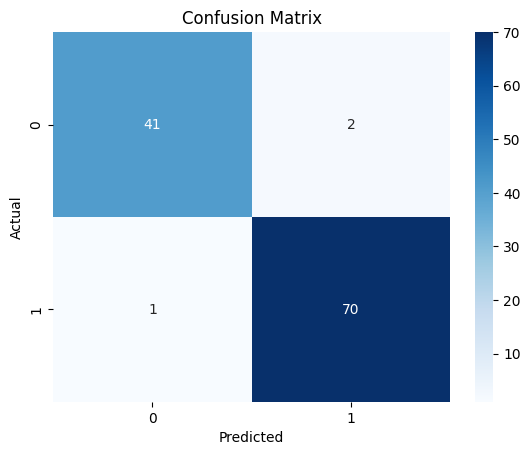

In [8]:
# Question 9: Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





# Question 10: You're working for a FinTech company trying to predict loan default using
# customer demographics and transaction behavior.
# The dataset is imbalanced, contains missing values, and has both numeric and
# categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
# ● Data preprocessing & handling missing/categorical values
# ● Choice between AdaBoost, XGBoost, or CatBoost
# ● Hyperparameter tuning strategy
# ● Evaluation metrics you'd choose and why
# ● How the business would benefit from your model

- 1. Data Preprocessing & Handling Missing/Categorical Values

a) Missing values:

Numerical → fill with mean/median or use iterative imputer.

Categorical → fill with mode or create “missing” category.

b) Categorical features:

Use CatBoost (native handling), or one-hot / target encoding for XGBoost/AdaBoost.

c) Imbalanced data:

Use SMOTE / ADASYN / class weights to balance the target classes.

d) Feature scaling:

Not strictly needed for tree-based models, but optional for numeric stability.

2. Choice of Boosting Algorithm

CatBoost: Best for mixed categorical + numeric features and robust to overfitting.

XGBoost: Fast, handles missing values natively, flexible for hyperparameter tuning.

AdaBoost: Simpler, works if data is mostly numeric and balanced.

Recommendation: CatBoost or XGBoost for this dataset.

3. Hyperparameter Tuning Strategy

Use GridSearchCV or RandomizedSearchCV for key parameters:

Learning rate, number of estimators, max depth, subsample, colsample_bytree.

Use early stopping on validation set to prevent overfitting.

4. Evaluation Metrics

Accuracy: Not sufficient for imbalanced dataset.

Precision / Recall / F1-score: Focus on Recall to catch potential defaulters.

ROC-AUC: Measures model’s ranking ability across thresholds.

Confusion matrix: For actionable insights on false positives/negatives.

5. Business Benefits

Reduce loan defaults: Predict risky customers before lending.

Targeted interventions: Offer reminders, counseling, or adjusted interest rates.

Revenue optimization: Reduce losses while maintaining growth by identifying low-risk borrowers.